In [1]:
import warnings
warnings.filterwarnings("ignore", message="The frame.append method is deprecated")
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sp6m_mpd = pd.read_csv('/content/drive/My Drive/IAQF_Data/eq_and_fx.csv')
sp6m_mpd.head()

,market,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc
0,sp6m,01/12/2007,6.0,0.018803,0.086435,-1.079705,1.837194,-0.095498,0.03382,0.111149,-20.0,0.024242,20.0,0.001915
1,sp6m,01/31/2007,6.0,0.018350,0.077969,-1.046439,1.842209,-0.083769,0.03099,0.102377,-20.0,0.016758,20.0,0.000767
2,sp6m,02/15/2007,6.0,0.019976,0.084543,-1.001081,1.588657,-0.092096,0.03361,0.111834,-20.0,0.021096,20.0,0.001900
3,sp6m,02/28/2007,6.0,0.018823,0.100147,-1.031801,1.638698,-0.114332,0.03565,0.126683,-20.0,0.036788,20.0,0.007350
4,sp6m,03/15/2007,6.0,0.018767,0.099519,-1.058040,1.823271,-0.112902,0.03536,0.125505,-20.0,0.036138,20.0,0.007715


In [5]:
sp_vix_data = pd.read_csv('/content/drive/My Drive/IAQF_Data/^VIX.csv')
sp_vix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,12.16,12.75,11.53,12.04,12.04,0.0
1,2007-01-04,12.40,12.42,11.28,11.51,11.51,0.0
2,2007-01-05,11.84,12.25,11.68,12.14,12.14,0.0
3,2007-01-08,12.48,12.83,11.78,12.00,12.00,0.0
4,2007-01-09,11.86,12.47,11.69,11.91,11.91,0.0


In [6]:
ftse100_data = pd.read_csv('/content/drive/My Drive/IAQF_Data/ftse100.csv')
ftse100_data.head()

,idt,mu,sd,skew,kurt
0,01-Apr-92,2447.62,238.46,-0.26,3.05
1,02-Apr-92,2431.08,228.49,-0.21,3.07
2,03-Apr-92,NaN,NaN,NaN,NaN
3,06-Apr-92,2432.91,225.41,-0.21,3.15
4,07-Apr-92,2433.45,225.80,-0.20,3.15


In [7]:
ftse100_vix_data = pd.read_csv('/content/drive/My Drive/IAQF_Data/ftse_100_vix.csv')
ftse100_vix_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/27/2019,10.96,10.89,11.54,10.27,NaN,-0.18%
1,06/26/2019,10.98,11.38,11.65,10.86,NaN,-3.94%
2,06/25/2019,11.43,11.26,11.61,10.92,NaN,1.33%
3,06/24/2019,11.28,10.70,11.43,10.39,NaN,5.92%
4,06/21/2019,10.65,10.16,10.92,9.73,NaN,3.60%


In [8]:
spx_returns = pd.read_csv('/content/drive/My Drive/IAQF_Data/^GSPC.csv')
spx_returns.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-12,1423.819946,1431.229980,1422.579956,1430.729980,1430.729980,2686480000
1,2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000
2,2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000
3,2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000
4,2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000


In [9]:
# Step 1: Calculate returns over the next 30 days
# This involves shifting the 'Adj Close' prices 30 days backward and then computing the return

spx_returns['Date'] = pd.to_datetime(spx_returns['Date'])
spx_returns.set_index('Date', inplace=True)

In [10]:
# Step 1: Calculate daily returns as a percentage
spx_returns['daily_return'] = spx_returns['Adj Close'].pct_change() * 100

# Step 2: Calculate rolling average returns over the next 30 days
# Initialize the column for forward average return
spx_returns['30_day_forward_avg_return'] = 0.0
for i in range(1, 31):
    spx_returns['30_day_forward_avg_return'] += spx_returns['daily_return'].shift(-i)
spx_returns['30_day_forward_avg_return'] /= 30

# Step 3: Calculate rolling volatility over the next 30 days in percentage terms
# Initialize the column for forward volatility
spx_returns['30_day_forward_volatility'] = 0.0
for i in range(1, 31):
    spx_returns['30_day_forward_volatility'] += (spx_returns['Adj Close'].shift(-i) - spx_returns['Adj Close'])**2
spx_returns['30_day_forward_volatility'] = (spx_returns['30_day_forward_volatility'] / 30).apply(lambda x: x if x > 0 else 0).apply(lambda x: x**0.5)
spx_returns['30_day_forward_volatility'] = spx_returns['30_day_forward_volatility'] / spx_returns['Adj Close'] * 100

# Display the first few rows of the modified dataframe
spx_returns.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility
Date,,,,,,,,,
2007-01-12,1423.819946,1431.229980,1422.579956,1430.729980,1430.729980,2686480000,NaN,-0.071641,1.168093
2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000,0.081780,-0.055831,1.170353
2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000,-0.089394,-0.061499,1.260543
2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000,-0.297074,-0.089606,1.497233
2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000,0.289547,-0.130616,1.555199


In [11]:
# Display the first few rows of the modified dataframe
spx_returns_cleaned = spx_returns.dropna()
spx_returns_cleaned.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility
Date,,,,,,,,,
2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000,0.081780,-0.055831,1.170353
2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000,-0.089394,-0.061499,1.260543
2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000,-0.297074,-0.089606,1.497233
2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000,0.289547,-0.130616,1.555199
2007-01-22,1430.469971,1431.390015,1420.400024,1422.949951,1422.949951,2540120000,-0.527791,-0.061378,1.778334


In [12]:
import matplotlib.pyplot as plt

sp_vix_data['Date'] = pd.to_datetime(sp_vix_data['Date'])
sp_vix_data.set_index('Date', inplace=True)

# Merge the GSPC and VIX data on Date
merged_data = spx_returns_cleaned.join(sp_vix_data['Adj Close'], how='inner', rsuffix='_VIX')

In [13]:
# Create a new column containing the difference between VIX Adj Close and the 30 Day Forward Volatility
merged_data['VIX_vs_SPX_vol_diff'] =  merged_data['30_day_forward_volatility'] - merged_data['Adj Close_VIX']

# Display the first few rows of the merged dataframe with the new column
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,VIX_vs_SPX_vol_diff
Date,,,,,,,,,,,
2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000,0.081780,-0.055831,1.170353,10.74,-9.569647
2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000,-0.089394,-0.061499,1.260543,10.59,-9.329457
2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000,-0.297074,-0.089606,1.497233,10.85,-9.352767
2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000,0.289547,-0.130616,1.555199,10.40,-8.844801
2007-01-22,1430.469971,1431.390015,1420.400024,1422.949951,1422.949951,2540120000,-0.527791,-0.061378,1.778334,10.77,-8.991666


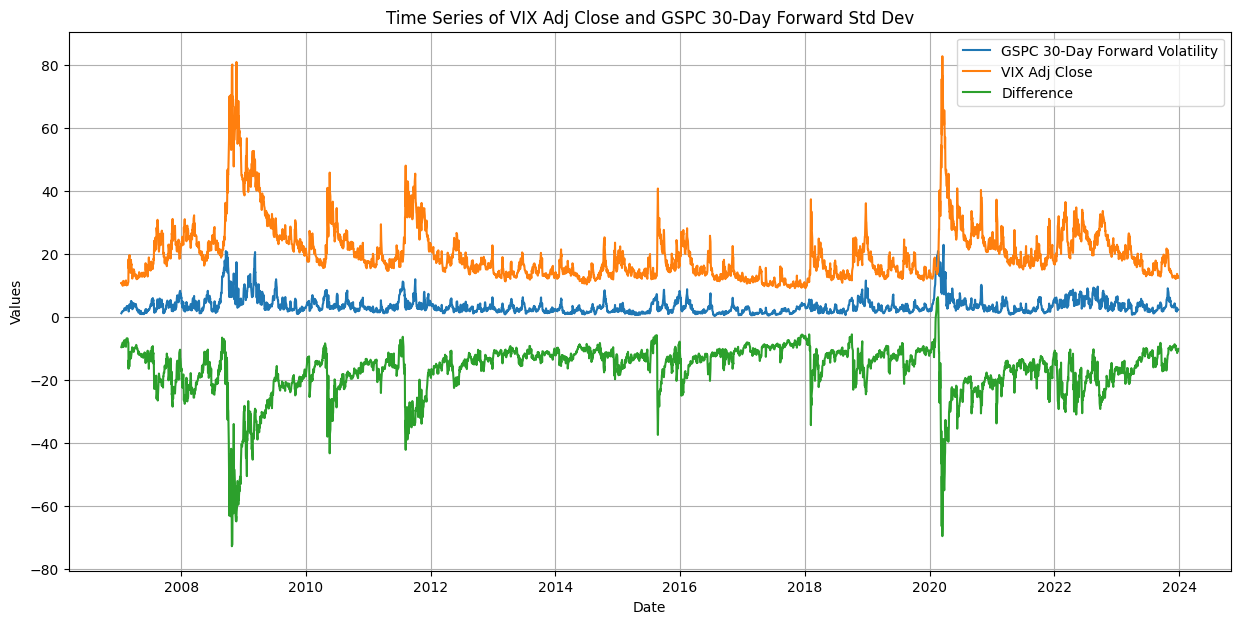

In [14]:
# Plotting the time series of VIX Adj Close values and 30-day forward standard deviation from the GSPC data
plt.figure(figsize=(15, 7))

plt.plot(merged_data.index, merged_data['30_day_forward_volatility'], label='GSPC 30-Day Forward Volatility')
plt.plot(merged_data.index, (merged_data['Adj Close_VIX']), label='VIX Adj Close')
plt.plot(merged_data.index, merged_data['VIX_vs_SPX_vol_diff'], label='Difference')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of VIX Adj Close and GSPC 30-Day Forward Std Dev')
plt.legend()
plt.grid(True)

plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

# Preparing the data for regression
# We'll use the 30-day forward average return as the independent variable (X)
# and the VIX vs SPX Volatility Difference as the dependent variable (y)

X = merged_data[['VIX_vs_SPX_vol_diff']]
y = merged_data['30_day_forward_avg_return']

# Removing rows with NaN values (as regression requires clean data)
X_clean = X.dropna()
y_clean = y[X.index.isin(X_clean.index)]

# Adding a constant to the independent variables for statsmodels regression
X_with_constant = sm.add_constant(X_clean)

# Creating the OLS (Ordinary Least Squares) model
model_sm = sm.OLS(y_clean, X_with_constant)

# Fitting the model
results = model_sm.fit()

# Getting the summary of the regression
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     30_day_forward_avg_return   R-squared:                       0.043
Model:                                   OLS   Adj. R-squared:                  0.043
Method:                        Least Squares   F-statistic:                     193.5
Date:                       Fri, 29 Mar 2024   Prob (F-statistic):           4.63e-43
Time:                               00:47:28   Log-Likelihood:                 1125.7
No. Observations:                       4268   AIC:                            -2247.
Df Residuals:                           4266   BIC:                            -2235.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0455      0.007     -6.943      0.000      -0.058      -0.033
VIX_vs_SPX_vol_diff    -0.0049      0.000    -13.912      0.000      -0.006      -0.004
==============================================================================
Omnibus:                     1361.602   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5985.342
Skew:                          -1.495   Prob(JB):                         0.00
Kurtosis:                       7.972   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

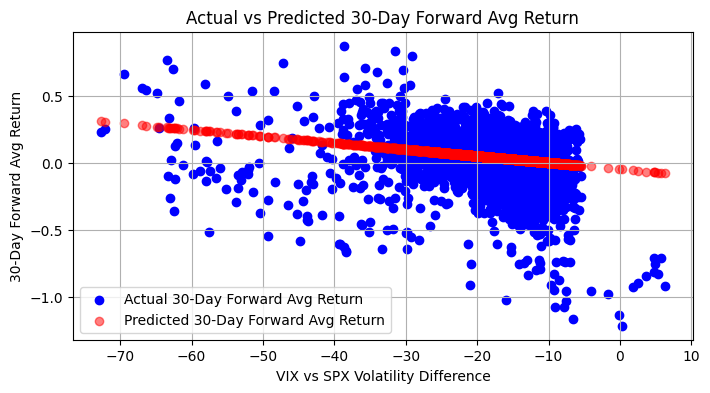

In [16]:
import matplotlib.pyplot as plt

# Predicting the y values using the regression model
y_predicted = results.predict(X_with_constant)

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 4))

plt.scatter(X_clean['VIX_vs_SPX_vol_diff'], y_clean, color='blue', label='Actual 30-Day Forward Avg Return')
plt.scatter(X_clean['VIX_vs_SPX_vol_diff'], y_predicted, color='red', label='Predicted 30-Day Forward Avg Return', alpha=0.5)

plt.xlabel('VIX vs SPX Volatility Difference')
plt.ylabel('30-Day Forward Avg Return')
plt.title('Actual vs Predicted 30-Day Forward Avg Return')
plt.legend()
plt.grid(True)

plt.show()


<Figure size 1200x600 with 0 Axes>

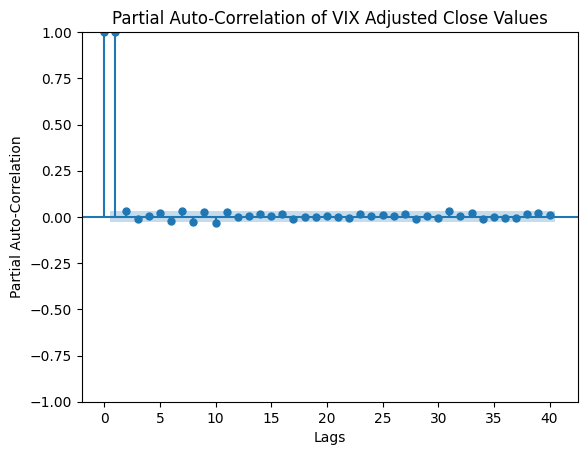

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

# Extracting the Adjusted Close values of VIX for Partial Auto-Correlation analysis
vix_adj_close = merged_data['Adj Close']

# Plotting the Partial AutoCorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(vix_adj_close, lags=40, method='ywm')
plt.title('Partial Auto-Correlation of VIX Adjusted Close Values')
plt.xlabel('Lags')
plt.ylabel('Partial Auto-Correlation')
plt.show()

<Figure size 1200x600 with 0 Axes>

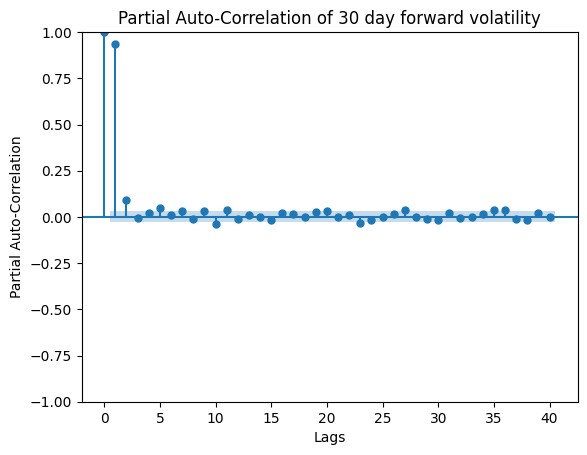

In [18]:
# Extracting the Adjusted Close values of VIX for Partial Auto-Correlation analysis
forward_vol = merged_data['30_day_forward_volatility']

# Plotting the Partial AutoCorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(forward_vol, lags=40, method='ywm')
plt.title('Partial Auto-Correlation of 30 day forward volatility')
plt.xlabel('Lags')
plt.ylabel('Partial Auto-Correlation')
plt.show()

In [19]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 9.6 MB/s eta 0:00:00


In [20]:
from arch import arch_model

# Preparing the data for GARCH modeling
# Using 70% of the '30_day_forward_volatility' data from the S&P 500 for training
volatility_data = spx_returns['30_day_forward_volatility'].dropna()
train_size = int(len(volatility_data) * 0.7)
train_data = volatility_data[:train_size]

# Building a GARCH(1,2) model
garch_model = arch_model(train_data, vol='Garch', p=1, q=2)

# Fitting the model
garch_fit = garch_model.fit(disp='off')

# Outputting the summary of the model
garch_summary = garch_fit.summary()
garch_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GARCH Model Results                         
=====================================================================================
Dep. Variable:     30_day_forward_volatility   R-squared:                       0.000
Mean Model:                    Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GARCH   Log-Likelihood:               -4865.84
Distribution:                         Normal   AIC:                           9741.68
Method:                   Maximum Likelihood   BIC:                           9771.73
                                               No. Observations:                 3009
Date:                       Fri, Mar 29 2024   Df Residuals:                     3008
Time:                               00:47:39   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.1096  7.328e-02     28.790 2.895e-182 [  1.966,  2.253]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1913  4.473e-02      4.276  1.900e-05    [  0.104,  0.279]
alpha[1]       0.8978  8.580e-02     10.465  1.256e-25    [  0.730,  1.066]
beta[1]        0.0642  3.785e-02      1.696  8.984e-02 [-9.982e-03,  0.138]
beta[2]        0.0380  8.053e-02      0.472      0.637    [ -0.120,  0.196]
===========================================================================

Covariance estimator: robust
"""

In [21]:
# Assuming garch_fit is your fitted GARCH model

# Prepare test data
test_data = volatility_data[train_size:]

# Rolling predictions
rolling_predictions = []
test_size = len(test_data)

for new_val in range(test_size):
    # Update the model with the new data point and forecast
    train = volatility_data[:-(test_size-new_val)]
    model_updated = arch_model(train, vol='Garch', p=1, q=2)
    model_updated_fit = model_updated.fit(disp='off')
    pred = model_updated_fit.forecast(horizon=1)
    # Store the prediction
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

# Aligning predicted data with test data dates
predicted_series = pd.Series(rolling_predictions, index=volatility_data.index[-test_size:])

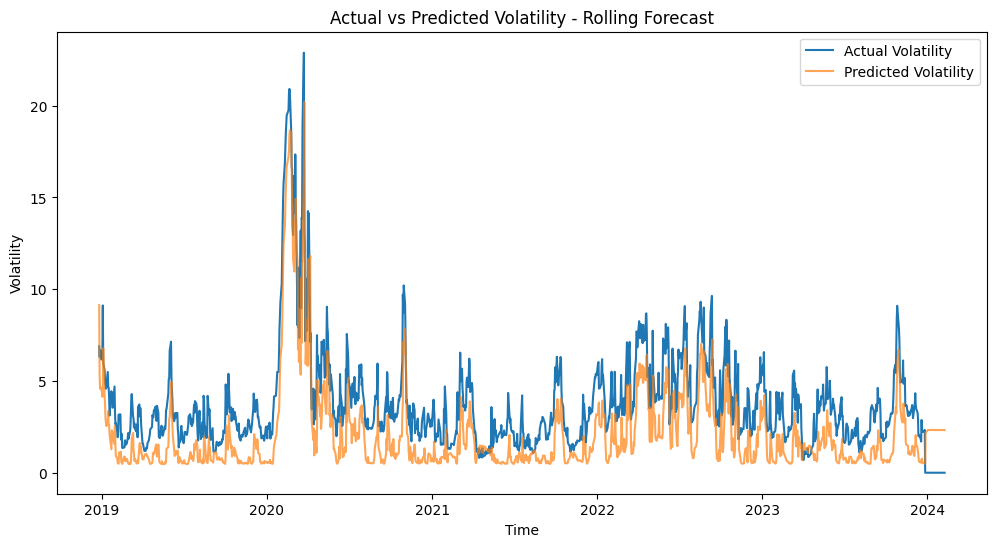

In [22]:
# Now plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Volatility')
plt.plot(predicted_series, label='Predicted Volatility', alpha=0.7)
plt.title('Actual vs Predicted Volatility - Rolling Forecast')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_data, predicted_series.values)
mae = mean_absolute_error(test_data, predicted_series.values)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 4.450626161500439
Mean Absolute Error: 1.8554903605772672


In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming test_data and predicted_series are already defined as per the given code

# Convert test_data and predicted_series to numpy arrays for calculation
actual = np.array(test_data)
predicted = np.array(predicted_series)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual, predicted)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, predicted)

# Calculate R-squared (R²)
r_squared = r2_score(actual, predicted)

mse, rmse, mae, r_squared

(4.450626161500439, 2.109650720261636, 1.8554903605772672, 0.42266560724980895)

In [25]:
import numpy as np
import pandas as pd
from arch import arch_model

# Assuming you have volatility_data and you've split it into train and test sets
# Let's also assume you have your model fitted as garch_fit

# Assuming garch_fit is your fitted GARCH model

# Prepare test data
test_data = volatility_data[train_size:]

# Rolling predictions with confidence intervals
rolling_predictions = []
rolling_lower = []
rolling_upper = []

test_size = len(test_data)

for new_val in range(test_size):
    # Update the model with the new data point and forecast
    train = volatility_data[:-(test_size-new_val)]
    model_updated = arch_model(train, vol='Garch', p=1, q=2)
    model_updated_fit = model_updated.fit(disp='off')
    pred = model_updated_fit.forecast(horizon=1)

    # Extracting the forecast mean and variance
    forecast_mean = pred.mean.values[-1, 0]
    forecast_variance = pred.variance.values[-1, 0]

    # Assuming normal distribution of forecasts
    lower_bound = forecast_mean - 1.96 * np.sqrt(forecast_variance)
    upper_bound = forecast_mean + 1.96 * np.sqrt(forecast_variance)

    # Store the prediction and confidence intervals
    rolling_predictions.append(forecast_mean)
    rolling_lower.append(lower_bound)
    rolling_upper.append(upper_bound)

# Convert lists to Pandas Series for easier handling
predicted_series = pd.Series(rolling_predictions, index=volatility_data.index[-test_size:])
lower_series = pd.Series(rolling_lower, index=volatility_data.index[-test_size:])
upper_series = pd.Series(rolling_upper, index=volatility_data.index[-test_size:])

# Count how many actual values fall within the predicted confidence interval
within_interval = ((test_data >= lower_series) & (test_data <= upper_series)).sum()
total_points = len(test_data)

# Calculate the proportion
proportion_within_interval = within_interval / total_points

# Check if the proportion is close to 95%
is_significant = proportion_within_interval >= 0.95


In [26]:
is_significant

True

In [27]:
# Assuming garch_fit is your fitted GARCH model

# Prepare test data
full_data = volatility_data[1:]

# Rolling predictions
rolling_predictions2 = []
test_size = len(full_data)

for new_val in range(test_size):
    # Update the model with the new data point and forecast
    train = volatility_data[:-(test_size-new_val)]
    model_updated = arch_model(train, vol='Garch', p=1, q=2)
    model_updated_fit = model_updated.fit(disp='off')
    pred = model_updated_fit.forecast(horizon=1)
    # Store the prediction
    rolling_predictions2.append(np.sqrt(pred.variance.values[-1,:][0]))

# Aligning predicted data with test data dates
predicted_series2 = pd.Series(rolling_predictions2, index=volatility_data.index[-test_size:])

/usr/local/lib/python3.10/dist-packages/arch/univariate/volatility.py:1197: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: invalid value encountered in add
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.1

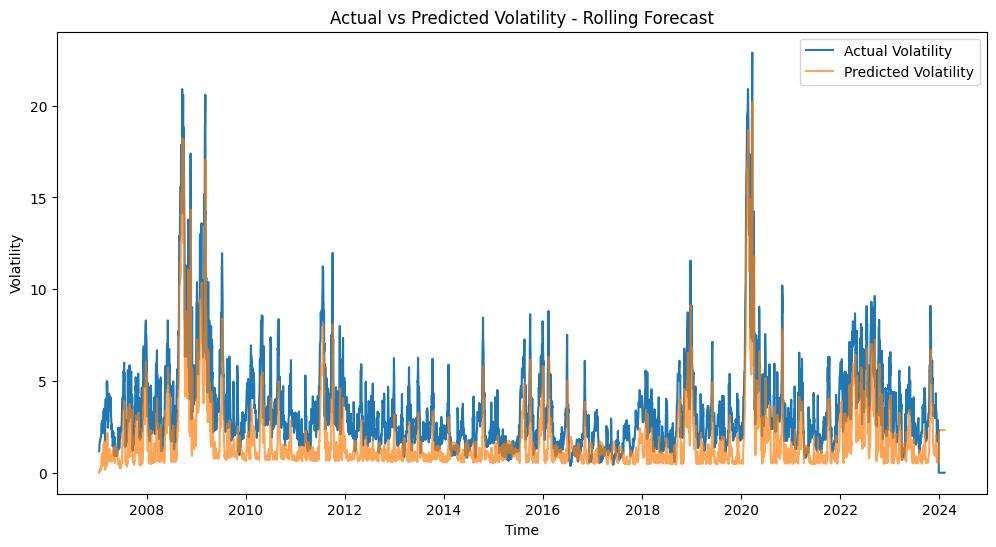

In [28]:
# Now plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(full_data, label='Actual Volatility')
plt.plot(predicted_series2, label='Predicted Volatility', alpha=0.7)
plt.title('Actual vs Predicted Volatility - Rolling Forecast')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [29]:
mse = mean_squared_error(full_data, predicted_series2.values)
mae = mean_absolute_error(full_data, predicted_series2.values)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 4.182167669785556
Mean Absolute Error: 1.7268217993649573


In [30]:
merged_data['Predicted Volatility'] = predicted_series2
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,VIX_vs_SPX_vol_diff,Predicted Volatility
Date,,,,,,,,,,,,
2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000,0.081780,-0.055831,1.170353,10.74,-9.569647,0.000000
2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000,-0.089394,-0.061499,1.260543,10.59,-9.329457,0.001130
2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000,-0.297074,-0.089606,1.497233,10.85,-9.352767,0.048862
2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000,0.289547,-0.130616,1.555199,10.40,-8.844801,0.158846
2007-01-22,1430.469971,1431.390015,1420.400024,1422.949951,1422.949951,2540120000,-0.527791,-0.061378,1.778334,10.77,-8.991666,0.181936


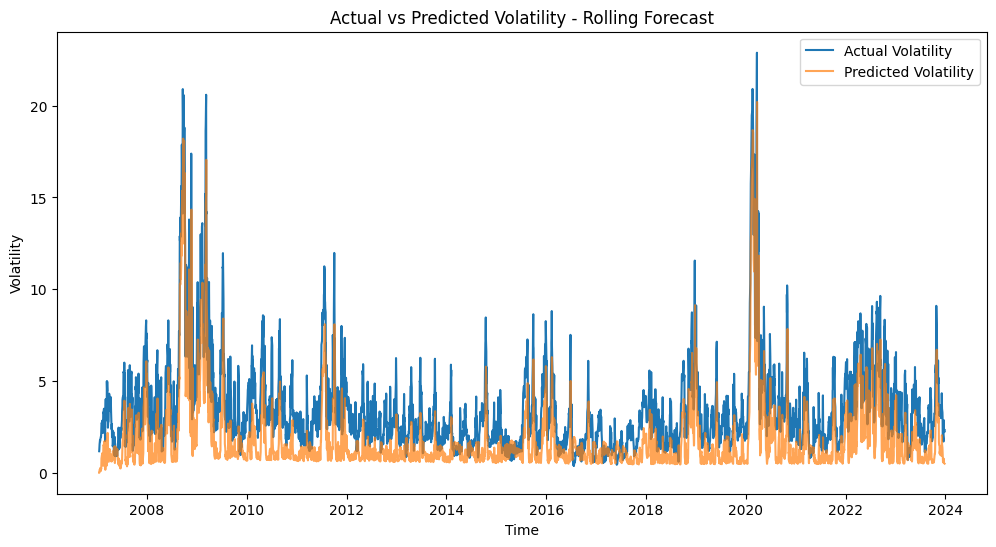

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['30_day_forward_volatility'], label='Actual Volatility')
plt.plot(merged_data['Predicted Volatility'], label='Predicted Volatility', alpha=0.7)
plt.title('Actual vs Predicted Volatility - Rolling Forecast')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [32]:
merged_data['Volatility_Diff'] = (merged_data['Predicted Volatility'] ** 2) - (merged_data['Adj Close_VIX'] ** 2)

In [33]:
vix_futures = pd.read_csv('/content/drive/My Drive/IAQF_Data/vix_futures.csv')
vix_futures.head()

,Dates,UX1 Index,UX2 Index,UX3 Index,UX4 Index
0,31/12/20,23.675,25.575,25.775,25.950
1,01/01/21,23.675,25.575,25.775,25.950
2,04/01/21,26.275,27.125,26.875,26.825
3,05/01/21,25.325,26.425,26.425,26.425
4,06/01/21,25.125,26.275,26.275,26.225


In [34]:
# Rename 'idt' column to 'Date' and keep only specified columns
sp6m_mpd.rename(columns={'idt': 'Date'}, inplace=True)
sp6m_mpd = sp6m_mpd[['Date', 'skew', 'p10', 'p90', 'prDec', 'prInc']]

# Convert 'Date' to datetime and set as index
sp6m_mpd['Date'] = pd.to_datetime(sp6m_mpd['Date'])
sp6m_mpd.set_index('Date', inplace=True)

<ipython-input-34-2b1bccc08fde>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp6m_mpd['Date'] = pd.to_datetime(sp6m_mpd['Date'])


In [35]:
sp6m_mpd = sp6m_mpd.reindex(merged_data.index)
sp6m_mpd.head(20)

,skew,p10,p90,prDec,prInc
Date,,,,,
2007-01-16,NaN,NaN,NaN,NaN,NaN
2007-01-17,NaN,NaN,NaN,NaN,NaN
2007-01-18,NaN,NaN,NaN,NaN,NaN
2007-01-19,NaN,NaN,NaN,NaN,NaN
2007-01-22,NaN,NaN,NaN,NaN,NaN
2007-01-23,NaN,NaN,NaN,NaN,NaN
2007-01-24,NaN,NaN,NaN,NaN,NaN
2007-01-25,NaN,NaN,NaN,NaN,NaN
2007-01-26,NaN,NaN,NaN,NaN,NaN


In [36]:
# Reindex sp6m_mpd to include all dates in merged_data, forward-filling missing dates
#sp6m_mpd = sp6m_mpd.reindex(merged_data.index, method='ffill')

# Calculate the differences and apply the logic described
columns_to_interpolate = ['skew', 'p10', 'p90', 'prDec', 'prInc']
for col in columns_to_interpolate:
    for date in sp6m_mpd.index:
        if pd.isna(sp6m_mpd.loc[date, col]):
            # Find the previous and next non-NaN values and their dates
            prev_date = sp6m_mpd[col].loc[:date].last_valid_index()
            next_date = sp6m_mpd[col].loc[date:].first_valid_index()
            if pd.notna(prev_date) and pd.notna(next_date) and prev_date != next_date:
                prev_val = sp6m_mpd.loc[prev_date, col]
                next_val = sp6m_mpd.loc[next_date, col]
                diff = next_val - prev_val
                days_diff = (next_date - prev_date).days
                increment = diff / days_diff

                # Apply incremental changes
                num_days = (date - prev_date).days
                sp6m_mpd.loc[date, col] = prev_val + num_days * increment

sp6m_mpd = sp6m_mpd.dropna()
# Display the first few rows of the modified dataframe
sp6m_mpd.head()

,skew,p10,p90,prDec,prInc
Date,,,,,
2007-01-31,-1.046439,-0.083769,0.102377,0.016758,0.000767
2007-02-01,-1.043415,-0.084324,0.103007,0.017047,0.000842
2007-02-02,-1.040392,-0.084880,0.103638,0.017336,0.000918
2007-02-05,-1.031320,-0.086545,0.105529,0.018204,0.001144
2007-02-06,-1.028296,-0.087100,0.106160,0.018493,0.001220


In [37]:
# Merging the sp6m_mpd DataFrame with the merged_data DataFrame
merged_data_final = pd.merge(merged_data, sp6m_mpd, left_index=True, right_index=True, how='left')

# Display the first few rows of the final merged DataFrame
merged_data_final = merged_data_final.dropna()
(merged_data_final.head())

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,VIX_vs_SPX_vol_diff,Predicted Volatility,Volatility_Diff,skew,p10,p90,prDec,prInc
Date,,,,,,,,,,,,,,,,,,
2007-01-31,1428.650024,1441.609985,1424.780029,1438.239990,1438.239990,2976690000,0.659288,-0.104071,2.176811,10.42,-8.243189,0.215239,-108.530072,-1.046439,-0.083769,0.102377,0.016758,0.000767
2007-02-01,1437.900024,1446.640015,1437.900024,1445.939941,1445.939941,2914890000,0.535373,-0.134678,2.539403,10.31,-7.770597,0.420751,-106.119068,-1.043415,-0.084324,0.103007,0.017047,0.000842
2007-02-02,1445.939941,1449.329956,1444.489990,1448.390015,1448.390015,2569450000,0.169445,-0.104011,2.704556,10.08,-7.375444,0.781182,-100.996155,-1.040392,-0.084880,0.103638,0.017336,0.000918
2007-02-05,1448.329956,1449.380005,1443.849976,1446.989990,1446.989990,2439430000,-0.096661,-0.079677,2.682342,10.55,-7.867658,0.943931,-110.411495,-1.031320,-0.086545,0.105529,0.018204,0.001144
2007-02-06,1446.979980,1450.189941,1443.400024,1448.000000,1448.000000,2608710000,0.069801,-0.025068,2.732542,10.65,-7.917458,0.919690,-112.576670,-1.028296,-0.087100,0.106160,0.018493,0.001220


In [38]:
# Function to calculate the cumulative return
def calculate_cumulative_return(data, days=30):
    cum_return = []
    for i in range(len(data)):
        if i + days < len(data):
            cum_return.append(data.iloc[i + days] / data.iloc[i] - 1)
        else:  # If less than 'days' days of data is left
            cum_return.append(data.iloc[-1] / data.iloc[i] - 1)
    return pd.Series(cum_return, index=data.index)

# Calculate the cumulative return and add as a new column
merged_data_final['Next_30_days_cum_return'] = calculate_cumulative_return(merged_data_final['Adj Close'], 30) * 100
merged_data_final['VIX_Settlement'] = merged_data_final['Adj Close_VIX'].shift(-30)

# Display the first few rows of the modified dataframe
(merged_data_final.head())

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,VIX_vs_SPX_vol_diff,Predicted Volatility,Volatility_Diff,skew,p10,p90,prDec,prInc,Next_30_days_cum_return,VIX_Settlement
Date,,,,,,,,,,,,,,,,,,,,
2007-01-31,1428.650024,1441.609985,1424.780029,1438.239990,1438.239990,2976690000,0.659288,-0.104071,2.176811,10.42,-8.243189,0.215239,-108.530072,-1.046439,-0.083769,0.102377,0.016758,0.000767,-3.195570,16.430000
2007-02-01,1437.900024,1446.640015,1437.900024,1445.939941,1445.939941,2914890000,0.535373,-0.134678,2.539403,10.31,-7.770597,0.420751,-106.119068,-1.043415,-0.084324,0.103007,0.017047,0.000842,-4.079698,16.790001
2007-02-02,1445.939941,1449.329956,1444.489990,1448.390015,1448.390015,2569450000,0.169445,-0.104011,2.704556,10.08,-7.375444,0.781182,-100.996155,-1.040392,-0.084880,0.103638,0.017336,0.000918,-3.198721,14.590000
2007-02-05,1448.329956,1449.380005,1443.849976,1446.989990,1446.989990,2439430000,-0.096661,-0.079677,2.682342,10.55,-7.867658,0.943931,-110.411495,-1.031320,-0.086545,0.105529,0.018204,0.001144,-2.491382,13.270000
2007-02-06,1446.979980,1450.189941,1443.400024,1448.000000,1448.000000,2608710000,0.069801,-0.025068,2.732542,10.65,-7.917458,0.919690,-112.576670,-1.028296,-0.087100,0.106160,0.018493,0.001220,-0.895025,12.190000


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming merged_data_final is your final DataFrame
merged_data_final = merged_data_final.dropna()
# Selecting predictor variables and target variable
#X = merged_data_final[['Volatility_Diff', 'skew', 'p10', 'p90']]
X = merged_data_final[['Predicted Volatility', 'skew', 'p10', 'p90', 'prDec', 'prInc']]
y = merged_data_final['VIX_Settlement']

# Handling missing values (dropping rows with NaN values in X and y)
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the linear regression model
linear_model = LinearRegression()

# Fitting the model
linear_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Extracting the coefficients
coefficients = linear_model.coef_

# Displaying MSE and the coefficients
print("Mean Squared Error:", mse)
print("Regression Coefficients:", coefficients)

Mean Squared Error: 36.084628914395644
Regression Coefficients: [  1.797129     0.87096748 -11.14039333 110.02951006  14.36121953
 -43.43607009]


In [40]:
X_with_const = sm.add_constant(X)

# Creating the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_const)

# Fitting the model
results = model.fit()

# Printing the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VIX_Settlement   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1013.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:54:37   Log-Likelihood:                -13461.
No. Observations:                4227   AIC:                         2.694e+04
Df Residuals:                    4220   BIC:                         2.698e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.2146 

In [41]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Assuming merged_data_final is ready and contains '30_day_forward_volatility'

# Preprocessing
features = merged_data_final[['Predicted Volatility', 'skew', 'p10', 'p90', 'prDec', 'prInc']]
target = merged_data_final['VIX_Settlement']

# Normalizing features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape for LSTM [samples, time steps, features]
X = np.reshape(scaled_features, (scaled_features.shape[0], 1, scaled_features.shape[1]))
y = target.values

# Save the dates for later plotting
dates = merged_data_final.index

# Split the dataset, keeping the dates aligned
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.3, random_state=42
)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(X.shape[1], X.shape[2]),
               kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.3))
model.add(LSTM(units=30, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=1))

# Compiling the model
optimizer = Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Training the model
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[early_stopping])

# Predicting on the test set
predicted_volatility = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_volatility)
print('Test MSE: ', mse)

# Align the predicted values with their corresponding dates
predicted_volatility_series = pd.Series(
    predicted_volatility.flatten(), index=dates_test
)


40/40 [==============================] - 1s 2ms/step
Test MSE:  38.72230674244091


In [43]:
import scipy.stats as stats

# Flatten the predicted_volatility for comparison
predicted_volatility_flat = predicted_volatility.flatten()

# Perform the t-test
t_stat, p_value = stats.ttest_ind(y_test, predicted_volatility_flat)

print("T-statistic:", t_stat)
print("p-value:", p_value)

# Check the significance
alpha = 0.05  # 95% confidence
if p_value < alpha:
    print("The difference in mean volatility between the actual and predicted is significant.")
else:
    print("The difference in mean volatility between the actual and predicted is not significant.")

T-statistic: 2.2315889667073554
p-value: 0.025729208989675633
The difference in mean volatility between the actual and predicted is significant.


In [44]:
mean_absolute_error(y_test, predicted_volatility)

3.950583926122258

In [45]:
y_test_series = pd.Series(y_test, index=dates_test)
predicted_volatility_series_sorted = predicted_volatility_series.sort_index()
y_test_series_sorted = y_test_series.sort_index()

In [46]:
all_predictions = []

# For rolling window predictions, you will iterate through each time step in the dataset
for i in range(len(X)):
    # Make a prediction for the current time step
    current_prediction = model.predict(X[i:i+1])
    all_predictions.append(current_prediction[0,0])  # Assuming the model outputs a single value

# Convert the predictions list to a pandas Series with the same index as `merged_data_final`
all_predictions_series = pd.Series(all_predictions, index=merged_data_final.index)

1/1 [==============================] - 0s 23ms/step


In [47]:
# Add the predictions series as a new column in `merged_data_final`
merged_data_final['LSTM_Predicted'] = all_predictions_series

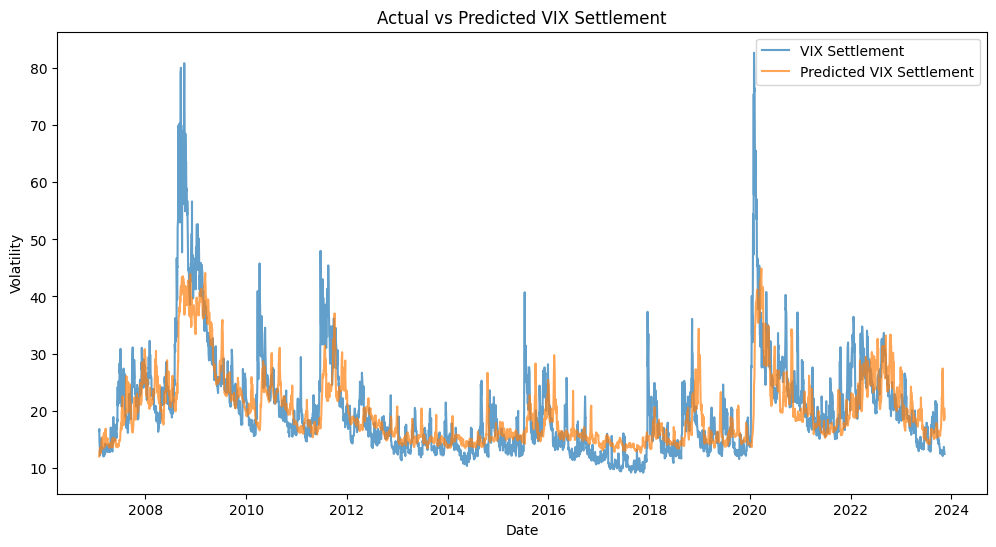

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data_final['VIX_Settlement'], label='VIX Settlement', alpha=0.7)
plt.plot(merged_data_final['LSTM_Predicted'], label='Predicted VIX Settlement', alpha=0.7)
plt.title('Actual vs Predicted VIX Settlement')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [49]:
merged_data_final.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,...,Predicted Volatility,Volatility_Diff,skew,p10,p90,prDec,prInc,Next_30_days_cum_return,VIX_Settlement,LSTM_Predicted
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,1428.650024,1441.609985,1424.780029,1438.239990,1438.239990,2976690000,0.659288,-0.104071,2.176811,10.42,...,0.215239,-108.530072,-1.046439,-0.083769,0.102377,0.016758,0.000767,-3.195570,16.430000,11.971340
2007-02-01,1437.900024,1446.640015,1437.900024,1445.939941,1445.939941,2914890000,0.535373,-0.134678,2.539403,10.31,...,0.420751,-106.119068,-1.043415,-0.084324,0.103007,0.017047,0.000842,-4.079698,16.790001,12.310230
2007-02-02,1445.939941,1449.329956,1444.489990,1448.390015,1448.390015,2569450000,0.169445,-0.104011,2.704556,10.08,...,0.781182,-100.996155,-1.040392,-0.084880,0.103638,0.017336,0.000918,-3.198721,14.590000,12.901271
2007-02-05,1448.329956,1449.380005,1443.849976,1446.989990,1446.989990,2439430000,-0.096661,-0.079677,2.682342,10.55,...,0.943931,-110.411495,-1.031320,-0.086545,0.105529,0.018204,0.001144,-2.491382,13.270000,13.245255
2007-02-06,1446.979980,1450.189941,1443.400024,1448.000000,1448.000000,2608710000,0.069801,-0.025068,2.732542,10.65,...,0.919690,-112.576670,-1.028296,-0.087100,0.106160,0.018493,0.001220,-0.895025,12.190000,13.233718


In [50]:
merged_data2 = merged_data_final

In [51]:
vix_futures.head()

,Dates,UX1 Index,UX2 Index,UX3 Index,UX4 Index
0,31/12/20,23.675,25.575,25.775,25.950
1,01/01/21,23.675,25.575,25.775,25.950
2,04/01/21,26.275,27.125,26.875,26.825
3,05/01/21,25.325,26.425,26.425,26.425
4,06/01/21,25.125,26.275,26.275,26.225


In [52]:
# import pandas as pd
# import numpy as np
# from datetime import datetime

# # Resetting the index of merged_data_final to facilitate merging
merged_data_final.reset_index(inplace=True)

# # Ensure vix_futures data is in the correct format
vix_futures['Dates'] = pd.to_datetime(vix_futures['Dates'], dayfirst=True)

# # Merge the datasets
combined_data = pd.merge(merged_data_final, vix_futures, left_on='Date', right_on='Dates', how='inner')

# # Setting a threshold for trading signals based on predicted volatility
volatility_threshold = combined_data['LSTM_Predicted'].mean()

In [53]:
# merged_data_final = merged_data_final[merged_data_final['Date'] >= pd.Timestamp('2009-01-01')]

In [54]:
def calculate_sharpe_ratio_corrected(returns, annual_risk_free_rate):
    # Convert annual risk-free rate to daily risk-free rate
    daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/252) - 1

    # Calculate daily excess returns
    daily_excess_returns = returns - daily_risk_free_rate

    # Calculate the annualized Sharpe ratio
    sharpe_ratio = daily_excess_returns.mean() / daily_excess_returns.std() * np.sqrt(252)
    return sharpe_ratio

merged_data_final['Trade_Signal_SPX'] = 0

# Calculate the 20-day moving average of the VIX (Adj Close_VIX)
merged_data_final['30d_MA_VIX'] = merged_data_final['Adj Close_VIX'].rolling(window=30).mean()

# Define the trading signal
# Long on S&P500 if predicted VIX (LSTM_Predicted) is lower than the 20-day MA of VIX, otherwise short
# merged_data_final['Trade_Signal_SPX'] = merged_data_final.apply(lambda row: 'Long' if row['LSTM_Predicted'] < row['30d_MA_VIX'] else 'Short', axis=1)
def determine_trade_signal(row):
    if row['LSTM_Predicted'] < 1.2 * row['30d_MA_VIX']:
        return 'Long'
    elif row['LSTM_Predicted'] > 1.5 * row['30d_MA_VIX']:
        return 'Short'
    else:
        return 'Hold'

merged_data_final['Trade_Signal_SPX'] = merged_data_final.apply(determine_trade_signal, axis=1)


# Calculate daily returns for S&P500
merged_data_final['SP500_Returns'] = merged_data_final['Adj Close'].pct_change().fillna(0)

# Apply the trading strategy
# If Long, use the S&P500 return, if Short, use the negative of the S&P500 return
#merged_data_final['Strategy_Returns_SPX'] = merged_data_final.apply(lambda row: row['SP500_Returns'] if row['Trade_Signal_SPX'] == 'Long' else -row['SP500_Returns'], axis=1)

def calculate_strategy_returns(row):
    if row['Trade_Signal_SPX'] == 'Long':
        return row['SP500_Returns']
    elif row['Trade_Signal_SPX'] == 'Short':
        return -row['SP500_Returns']
    else:
        return row['SP500_Returns'] * 0

merged_data_final['Strategy_Returns_SPX'] = merged_data_final.apply(calculate_strategy_returns, axis=1)


# Calculate cumulative returns
merged_data_final['Cumulative_Returns'] = (1 + merged_data_final['Strategy_Returns_SPX']).cumprod()

# Calculate the number of years in the dataset for CAGR calculation
num_years = (merged_data_final['Date'].iloc[-1] - merged_data_final['Date'].iloc[0]).days / 365.25

# Calculate CAGR for the strategy
cagr = (merged_data_final['Cumulative_Returns'].iloc[-1] ** (1 / num_years)) - 1

# Risk-free rate for Sharpe Ratio calculation
risk_free_rate = 0.0426

# Calculate the Sharpe Ratio
sharpe_ratio = calculate_sharpe_ratio_corrected(merged_data_final['Strategy_Returns_SPX'], risk_free_rate)

cagr, sharpe_ratio


(0.14488193137229177, 0.5899943132855414)

In [55]:
merged_data_final['SP500_Cumulative_Returns'] = (1 + merged_data_final['SP500_Returns']).cumprod()

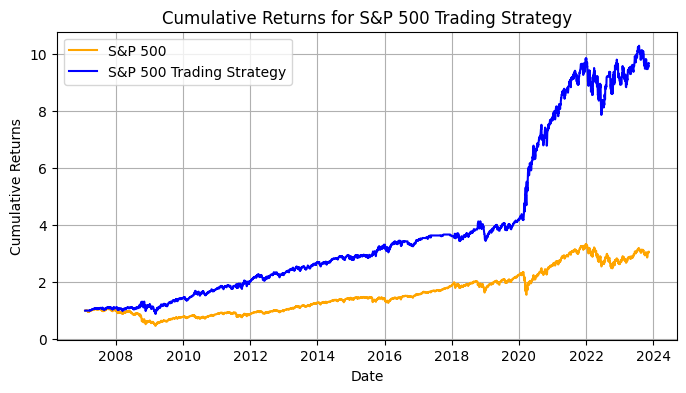

In [56]:
import matplotlib.pyplot as plt

# Plotting the cumulative returns for the trading strategy
plt.figure(figsize=(8, 4))
plt.plot(merged_data_final['Date'], merged_data_final['SP500_Cumulative_Returns'], label='S&P 500', color='orange')
plt.plot(merged_data_final['Date'], merged_data_final['Cumulative_Returns'], label='S&P 500 Trading Strategy', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns for S&P 500 Trading Strategy')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
def calculate_max_drawdown(cumulative_returns):
    """
    Calculate the maximum drawdown of the trading strategy.

    :param cumulative_returns: Series of cumulative returns of the strategy.
    :return: Maximum drawdown in percentage.
    """
    # Calculate the running maximum
    running_max = cumulative_returns.cummax()
    # Calculate the drawdown
    drawdown = (cumulative_returns - running_max) / running_max
    # Calculate the maximum drawdown
    max_drawdown = drawdown.min()
    return max_drawdown

# Calculate the maximum drawdown for the strategy
max_drawdown = calculate_max_drawdown(merged_data_final['Cumulative_Returns'])
max_drawdown_percentage = max_drawdown * 100  # Convert to percentage

max_drawdown_percentage



-32.73377787720609

In [58]:
def apply_trailing_stop_loss_strategy(cumulative_returns, trade_signals, trailing_stop_loss_percent):
    """
    Apply a trailing stop-loss strategy to both long and short positions in the trading strategy.

    :param cumulative_returns: Series of cumulative returns of the strategy.
    :param trade_signals: Series of trade signals ('Long', 'Short', or other).
    :param trailing_stop_loss_percent: Trailing stop-loss percentage (in decimal format).
    :return: Series with updated cumulative returns applying the trailing stop-loss strategy.
    """
    peak_value = 1.0
    trough_value = 1.0
    stop_loss_value = 1.0
    updated_cumulative_returns = cumulative_returns.copy()

    for i in range(len(cumulative_returns)):
        current_signal = trade_signals.iloc[i]
        current_return = cumulative_returns.iloc[i]

        if current_signal == 'Long':
            # Update peak value for long positions
            if current_return > peak_value:
                peak_value = current_return
                stop_loss_value = peak_value * (1 - trailing_stop_loss_percent)

            # Check if current value is below the trailing stop-loss level
            if current_return < stop_loss_value:
                # Stop-loss triggered for long position
                updated_cumulative_returns.iloc[i] = stop_loss_value
                # Reset peak value for the next position
                if i < len(cumulative_returns) - 1:
                    peak_value = updated_cumulative_returns.iloc[i+1]
                    stop_loss_value = peak_value * (1 - trailing_stop_loss_percent)

        elif current_signal == 'Short':
            # Update trough value for short positions
            if current_return < trough_value:
                trough_value = current_return
                stop_loss_value = trough_value * (1 + trailing_stop_loss_percent)

            # Check if current value is above the trailing stop-loss level
            if current_return > stop_loss_value:
                # Stop-loss triggered for short position
                updated_cumulative_returns.iloc[i] = stop_loss_value
                # Reset trough value for the next position
                if i < len(cumulative_returns) - 1:
                    trough_value = updated_cumulative_returns.iloc[i+1]
                    stop_loss_value = trough_value * (1 + trailing_stop_loss_percent)

        else:
            # For other signals, retain the current return value
            updated_cumulative_returns.iloc[i] = current_return

    return updated_cumulative_returns

# Trailing stop-loss percentage (5%)
trailing_stop_loss_percent = 0.05

# Apply trailing stop-loss strategy to the trading strategy
merged_data_final['Cumulative_Returns_TSL'] = apply_trailing_stop_loss_strategy(merged_data_final['Cumulative_Returns'], merged_data_final['Trade_Signal_SPX'], trailing_stop_loss_percent)


In [59]:
cagr = (merged_data_final['Cumulative_Returns_TSL'].iloc[-1] ** (1 / num_years)) - 1
merged_data_final['Strategy_Returns_Combined'] = merged_data_final['Cumulative_Returns_TSL'].pct_change().fillna(0)

# Calculate the annualized return and standard deviation
annualized_return = merged_data_final['Strategy_Returns_Combined'].mean() * 252
annualized_std_dev = merged_data_final['Strategy_Returns_Combined'].std() * np.sqrt(252)

# Assuming a risk-free rate (e.g., 0.0426 or 4.26%)
risk_free_rate = 0.0426

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev
cagr, sharpe_ratio

(0.14488193137229177, 0.5910553685923072)

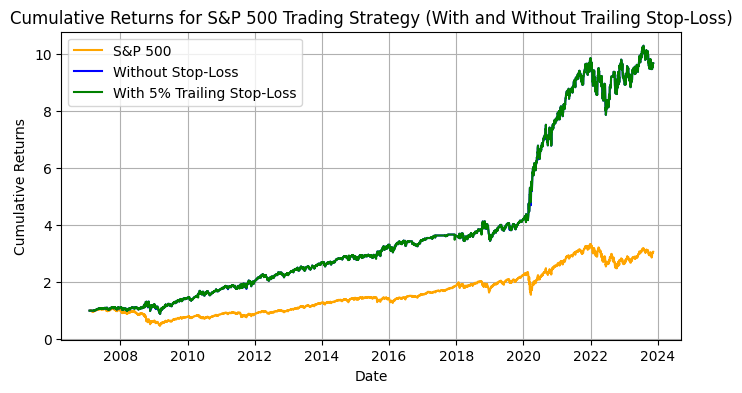

In [60]:
# Plotting the cumulative returns with trailing stop-loss strategy
plt.figure(figsize=(8, 4))
plt.plot(merged_data_final['Date'], merged_data_final['SP500_Cumulative_Returns'], label='S&P 500', color='orange')
plt.plot(merged_data_final['Date'], merged_data_final['Cumulative_Returns'], label='Without Stop-Loss', color='blue')
plt.plot(merged_data_final['Date'], merged_data_final['Cumulative_Returns_TSL'], label='With 5% Trailing Stop-Loss', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns for S&P 500 Trading Strategy (With and Without Trailing Stop-Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from statsmodels.stats.diagnostic import het_white

def newey_west_analysis(strategy_returns, benchmark_returns):
    # Ensure that the data is in DataFrame format and align the indices
    strategy_df = pd.DataFrame(strategy_returns, columns=['Cumulative_Returns_TSL'])
    benchmark_df = pd.DataFrame(benchmark_returns, columns=['SP500_Cumulative_Returns'])
    combined_df = strategy_df.join(benchmark_df, how='inner')

    # Define the independent variable (benchmark returns) and add a constant
    X = combined_df['SP500_Cumulative_Returns']
    X = sm.add_constant(X)

    # Define the dependent variable (strategy returns)
    Y = combined_df['Cumulative_Returns_TSL']

    # Perform the regression using Newey-West standard errors
    model = sm.OLS(Y, X).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    # Output the summary of the regression
    return model.summary()

# Example usage
strategy_returns = merged_data_final
benchmark_returns = merged_data_final
result = newey_west_analysis(strategy_returns, benchmark_returns)
print(result)


                              OLS Regression Results                              
Dep. Variable:     Cumulative_Returns_TSL   R-squared:                       0.923
Model:                                OLS   Adj. R-squared:                  0.923
Method:                     Least Squares   F-statistic:                 2.539e+04
Date:                    Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                            01:03:39   Log-Likelihood:                -4825.3
No. Observations:                    4227   AIC:                             9655.
Df Residuals:                        4225   BIC:                             9667.
Df Model:                               1                                         
Covariance Type:                      HAC                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [62]:
from google.colab import files

# Save DataFrame to CSV
merged_data_final.to_csv('trading_signals.csv', index=False)

# Download the CSV file
files.download('trading_signals.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
merged_data_final.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,...,VIX_Settlement,LSTM_Predicted,Trade_Signal_SPX,30d_MA_VIX,SP500_Returns,Strategy_Returns_SPX,Cumulative_Returns,SP500_Cumulative_Returns,Cumulative_Returns_TSL,Strategy_Returns_Combined
4222,2023-11-07,4366.209961,4386.259766,4355.410156,4378.379883,4378.379883,3791230000,0.284012,0.237490,4.953870,...,13.67,18.666082,Long,18.191667,0.002840,0.002840,9.614010,3.044262,9.614010,0.002840
4223,2023-11-08,4384.370117,4391.200195,4359.759766,4382.779785,4382.779785,3729510000,0.100492,0.268478,5.091535,...,13.65,18.311728,Long,18.066000,0.001005,0.001005,9.623672,3.047322,9.623672,0.001005
4224,2023-11-09,4391.410156,4393.399902,4343.939941,4347.350098,4347.350098,3900780000,-0.808384,0.300958,6.115838,...,13.03,18.581419,Long,17.997667,-0.008084,-0.008084,9.545876,3.022688,9.545876,-0.008084
4225,2023-11-10,4364.149902,4418.029785,4353.339844,4415.240234,4415.240234,3665080000,1.561644,0.263009,4.853235,...,12.99,20.388525,Long,17.886000,0.015616,0.015616,9.694948,3.069891,9.694948,0.015616
4226,2023-11-13,4406.660156,4421.759766,4393.819824,4411.549805,4411.549805,3326240000,-0.083584,0.270563,5.164733,...,12.43,18.625471,Long,17.791000,-0.000836,-0.000836,9.686845,3.067325,9.686845,-0.000836
